In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import missingno as msno
import seaborn as sns
import numpy as np

In [2]:
Data=pd.read_csv('/content/music_genre.csv')

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [4]:
Data["tempo"]=Data["tempo"].replace('?',np.nan)
Data["tempo"]=Data["tempo"].astype(float)

# Update music_genre column
#Data = Data.drop(Data[Data['artist_name'] == 'empty_field'].index)
Data.groupby(['music_genre'])['tempo'].mean()

Data['tempo']=Data['tempo'].fillna(Data.groupby(['music_genre'])['tempo'].transform('mean'))

In [5]:
Data = Data.dropna()


In [6]:
from sklearn.preprocessing import LabelEncoder

# assume your column of 12 objects is named 'category_column'
encoder = LabelEncoder()
Data['key'] = encoder.fit_transform(Data['key'])

<ipython-input-6-a918a0fb3981>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['key'] = encoder.fit_transform(Data['key'])


In [7]:
grouped_df = Data.groupby([ 'music_genre','artist_name']).size().reset_index(name='count')
pivot_table = pd.pivot_table(grouped_df, values='count', index='artist_name', columns='music_genre', fill_value=0)
pivot_table

music_genre,Alternative,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
artist_name,,,,,,,,,,
!!!,1,0,0,0,0,21,0,0,0,0
"""Weird Al"" Yankovic",0,0,0,0,0,0,0,0,0,1
$NOT,0,0,0,0,0,0,3,0,0,0
$tupid Young,0,0,0,0,0,0,0,0,1,0
$uicideBoy$,0,0,0,0,0,0,51,0,41,0
...,...,...,...,...,...,...,...,...,...,...
棗坂シキ(CV.平川大輔),0,1,0,0,0,0,0,0,0,0
楚神ウリエ(CV.近藤隆),0,2,0,0,0,0,0,0,0,0
立華リツカ(CV.茜屋日海夏),0,1,0,0,0,0,0,0,0,0


In [8]:
a=pd.DataFrame(pivot_table)

In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  int64  
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  float64
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

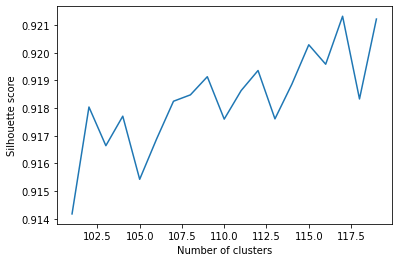

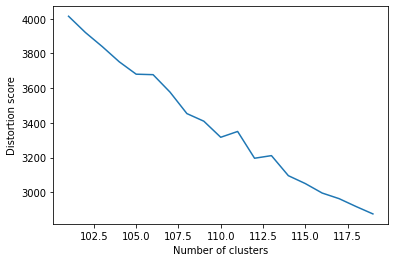

In [11]:
from scipy.sparse import csr_matrix

# Convert your data to a sparse matrix
sparse_matrix = csr_matrix(pivot_table)
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Compute cosine similarity matrix
cos_sim_matrix = cosine_similarity(sparse_matrix)
distortion_scores = []

# Compute silhouette scores for different number of clusters
silhouette_scores = []
for n_clusters in range(101, 120):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(cos_sim_matrix)
    silhouette_scores.append(silhouette_score(cos_sim_matrix, cluster_labels))
    distortion_scores.append(kmeans.inertia_)
# Plot silhouette scores vs number of clusters
plt.plot(range(101, 120), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

# Compute distortion scores for different number of clusters


# Plot distortion scores vs number of clusters
plt.plot(range(101, 120), distortion_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion score')
plt.show()


In [12]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
cos_sim_matrix = cosine_similarity(sparse_matrix)

# Assuming your data is stored in a pandas dataframe called 'df'
# Run kmeans with k=103
kmeans = KMeans(n_clusters=109, random_state=42)
cluster_labels = kmeans.fit_predict(cos_sim_matrix)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
diction={}
for i in range(6863):
  diction[a.index[i]]=cluster_labels[i]

In [14]:
Data['cluster'] = Data['artist_name'].replace(diction)
dummies = pd.get_dummies(Data['cluster'], prefix='column_name')

# concatenate dummies with original dataframe
Data = pd.concat([Data, dummies], axis=1)
Data = Data.drop('cluster', axis=1)

In [45]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.base import BaseEstimator, ClassifierMixin

class MyModel(BaseEstimator, ClassifierMixin):
    def __init__(self,C=0.1,penalty='l2',solver='lbfgs'):
        self.C = C
        self.penalty=penalty
        self.solver=solver

     #   self.clf = LogisticRegression()
        self.oversampler = SMOTE()
        self.models = [LogisticRegression(C=C,solver=solver,penalty=penalty,max_iter=1000) for _ in range(10)]
    def fit(self, X, y_bin):
        
       # mlb = MultiLabelBinarizer()
        #y_bin = mlb.fit_transform(y)
        for i, model in enumerate(self.models):
            X_resampled, y_resampled = self.oversampler.fit_resample(X, y_bin[:, i])
            self.models[i]=model.fit(X_resampled, y_resampled)
            
    def predict(self, X):
        #print(len(self.models))
        y_pred1 = np.zeros((X.shape[0], len(self.models)))
        y_pred2 = np.zeros((X.shape[0], len(self.models)))
        for i, model in enumerate(self.models):
            a = model.predict_proba(X)
            y_pred1[:, i] = a[:, 0]
            y_pred2[:, i] = a[:, 1]
           # print(y_pred2.shape)
        
        new_arr = np.zeros_like(y_pred2)

        new_arr[np.arange(y_pred2.shape[0]), np.argmax(y_pred2, axis=1)] = int(1)
        return new_arr    
    def score(self, X, y, sample_weight=None):
       # y = mlb.fit_transform(y)
      #  print("score",y.shape)
        y_pred = self.predict(X)
     #   print("score 0",y_pred.shape)
       # return f1_score(y, y_pred, average='weighted', sample_weight=sample_weight)
        return accuracy_score(y,y_pred)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV

ss = StandardScaler()
my_model = MyModel()

param_grid = {'C': [0.1,0.3,0.5, 1, 10]}
#param_grid = {
   # 'penalty': ['l1', 'l2', 'elasticnet', 'none'],
  #  'C': [0.1,0.5, 1, 10],
 #   'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

#}
#pipeline = Pipeline(('estimator', my_model])
X_train, X_test, y_train, y_test = train_test_split(ss.fit_transform(Data.select_dtypes(exclude=['object']).values), Data['music_genre'].apply(lambda x: [x]), test_size=0.2, random_state=42)
grid_search = GridSearchCV(my_model, param_grid=param_grid, cv=5)
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'C': 0.3}


In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV

ss = StandardScaler()
my_model = MyModel()

param_grid = {
    'penalty': [ 'l2',  ],
    'C': [0.1,0.5, 1, 10],
    'solver': [ 'lbfgs', 'liblinear']

}
#pipeline = Pipeline(('estimator', my_model])
X_train, X_test, y_train, y_test = train_test_split(ss.fit_transform(Data.select_dtypes(exclude=['object']).values), Data['music_genre'].apply(lambda x: [x]), test_size=0.2, random_state=42)
grid_search = GridSearchCV(my_model, param_grid=param_grid, cv=5)
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
grid_search

In [127]:
print(grid_search.best_params_)

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

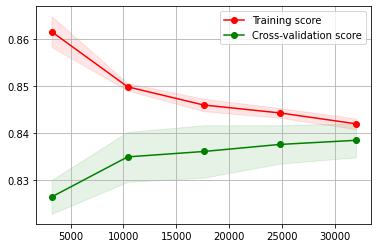

In [126]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

my_model = MyModel(C= 10, penalty= 'l2', solver= 'liblinear')

plot_learning_curve(my_model, X_train, y_train,cv=5,n_jobs=1)


In [68]:
from sklearn.metrics import multilabel_confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(ss.fit_transform(Data.select_dtypes(exclude=['object']).values), Data['music_genre'].apply(lambda x: [x]), test_size=0.2, random_state=42)
y_train = mlb.transform(y_train)

my_model.fit(X_train, y_train)

y_test = mlb.transform(y_test)
y_pred=my_model.predict(X_test)
cm2 = multilabel_confusion_matrix(y_test, y_pred)
print(cm2)

[[[8730  262]
  [ 172  836]]

 [[8933   33]
  [  30 1004]]

 [[8854  125]
  [  62  959]]

 [[9017   28]
  [  20  935]]

 [[8872  142]
  [  69  917]]

 [[8914   77]
  [  38  971]]

 [[8614  391]
  [ 324  671]]

 [[8932   83]
  [ 107  878]]

 [[8707  263]
  [ 476  554]]

 [[8847  176]
  [ 282  695]]]


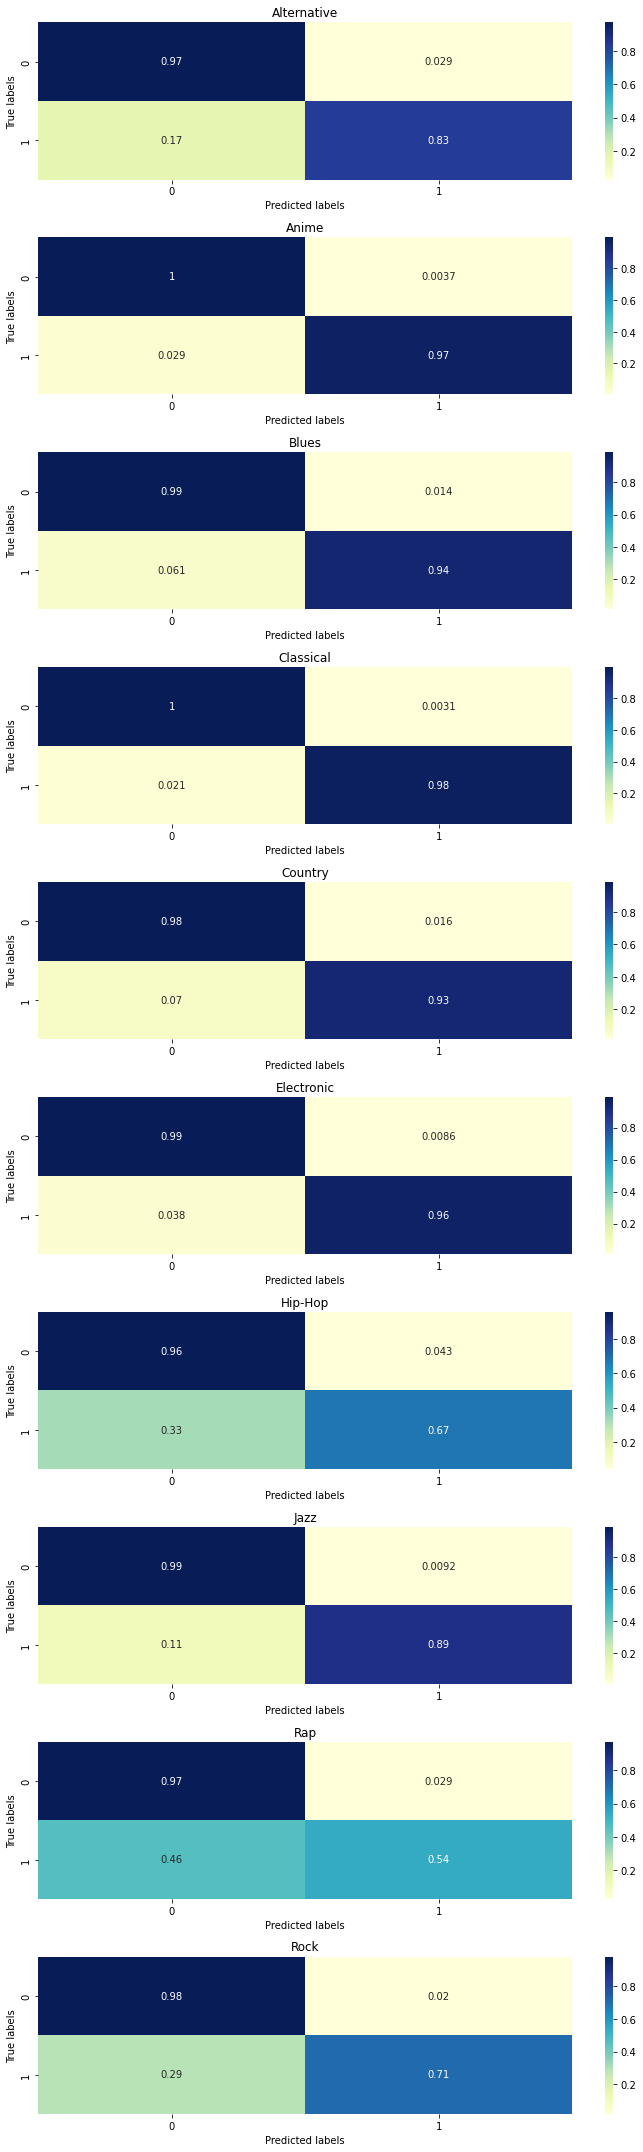

In [70]:
# Get the class labels
class_labels = mlb.classes_

# Loop through the labels and calculate the confusion matrix
cm = []
for i, label in enumerate(class_labels):
    y_true = y_test[:, i]
    y_pred2 = y_pred[:, i]
    cm_i = confusion_matrix(y_true, y_pred2)
    cm_i_norm = cm_i / cm_i.sum(axis=1, keepdims=True)
    cm.append(cm_i_norm)

# Loop through the labels and plot the confusion matrix
fig, axes = plt.subplots(nrows=len(class_labels), figsize=(10, 30))

for i, label in enumerate(class_labels):
    sns.heatmap(cm[i], annot=True, cmap="YlGnBu", ax=axes[i])
    axes[i].set_title(label)
    axes[i].set_xlabel('Predicted labels')
    axes[i].set_ylabel('True labels')

plt.tight_layout()


In [67]:
y_pred.shape

(10000,)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8415

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.base import BaseEstimator, ClassifierMixin

class MyModel(BaseEstimator, ClassifierMixin):
    def __init__(self,C=0.1,penalty='l2',solver='lbfgs'):
        self.C = C
        self.penalty=penalty
        self.solver=solver

     #   self.clf = LogisticRegression()
        self.oversampler = SMOTE()
        self.models = [LogisticRegression(C=C,solver=solver,penalty=penalty,max_iter=1000) for _ in range(10)]
    def fit(self, X, y_bin):
        
       # mlb = MultiLabelBinarizer()
        #y_bin = mlb.fit_transform(y)
        for i, model in enumerate(self.models):
            X_resampled, y_resampled = self.oversampler.fit_resample(X, y_bin[:, i])
            self.models[i]=model.fit(X_resampled, y_resampled)
            
    def predict(self, X):
        #print(len(self.models))
        y_pred1 = np.zeros((X.shape[0], len(self.models)))
        y_pred2 = np.zeros((X.shape[0], len(self.models)))
        for i, model in enumerate(self.models):
            a = model.predict_proba(X)
            y_pred1[:, i] = a[:, 0]
            y_pred2[:, i] = a[:, 1]
           # print(y_pred2.shape)
        
        new_arr = np.zeros_like(y_pred2)

        new_arr[np.arange(y_pred2.shape[0]), np.argmax(y_pred2, axis=1)] = int(1)
        return new_arr    
    def score(self, X, y, sample_weight=None):
       # y = mlb.fit_transform(y)
      #  print("score",y.shape)
        y_pred = self.predict(X)
     #   print("score 0",y_pred.shape)
       # return f1_score(y, y_pred, average='weighted', sample_weight=sample_weight)
        return accuracy_score(y,y_pred)

In [91]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# charger les données
X_train, X_test, y_train, y_test = train_test_split(ss.fit_transform(Data.select_dtypes(exclude=['object']).values),  Data['music_genre'].apply(lambda x: [x]), test_size=0.2, random_state=42)

# convertir les étiquettes en un format binaire avec MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train)
y_test = mlb.transform(y_test)
y_train = mlb.inverse_transform(y_train)
y_test = mlb.inverse_transform(y_test)
clf =make_pipeline(StandardScaler(), LogisticRegression())
    #RandomUnderSampler(random_state=42),
                   # LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000))
#print(y_test.shape)
# Initialisation du classifieur binaire
clf = LogisticRegression(penalty='l2', C=0.1, solver='lbfgs', max_iter=1000)
#clf = LogisticRegression()

# Initialisation de OneVsOneClassifier avec le classifieur binaire
ovo_clf = OneVsOneClassifier(clf)

# Entraînement du modèle
ovo_clf.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = ovo_clf.predict(X_test)

# Évaluation des performances du modèle avec la métrique F1-score
accuracy = accuracy_score(y_test, y_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [99]:
accuracy

0.846

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

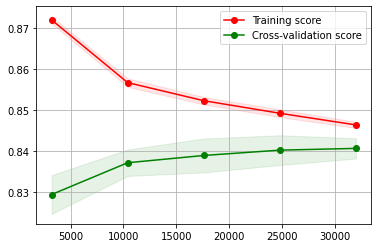

In [31]:

clf = LogisticRegression(penalty='l2', C=0.1, solver='lbfgs', max_iter=1000)

ovo_clf = OneVsOneClassifier(clf)
my_model2 = ovo_clf

plot_learning_curve(my_model2, X_train, y_train,cv=5,n_jobs=4)

In [32]:
from sklearn.metrics import confusion_matrix

# Assuming ypred and ytest are already defined
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 822    2   18    0   26   22   38   12   12   56]
 [   2 1009    5   13    0    1    0    4    0    0]
 [  12   17  947    3    5    2    0   20    0   15]
 [   1   13    2  937    0    0    0    2    0    0]
 [  11    3   16    0  909    1    3    2    3   38]
 [   4    6    5    0    1  961    2   28    1    1]
 [  46    0    0    0    0    2  729    5  209    4]
 [   4    1   34   11    7   43    0  884    0    1]
 [  29    0    0    0   14    0  394    3  564   26]
 [ 129    2   31    1   84    1    5    8   18  698]]


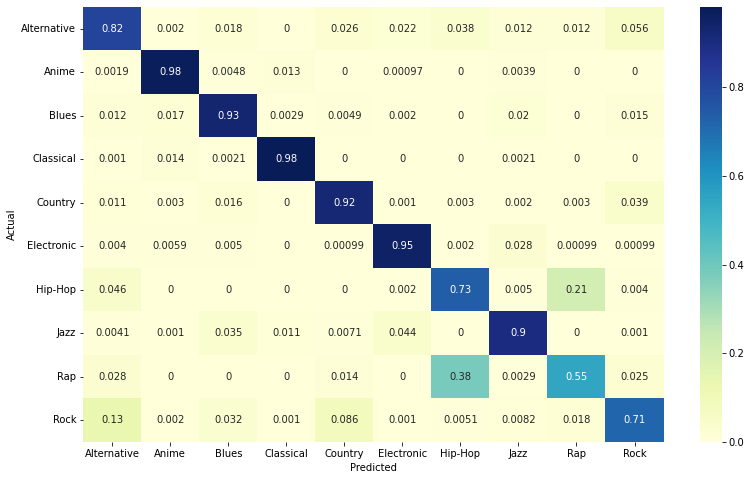

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
labels = mlb.classes_
cm_norm = cm / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(13, 8))
sns.heatmap(cm_norm, annot=True, cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [98]:
len(ovo_clf.estimators_)


45

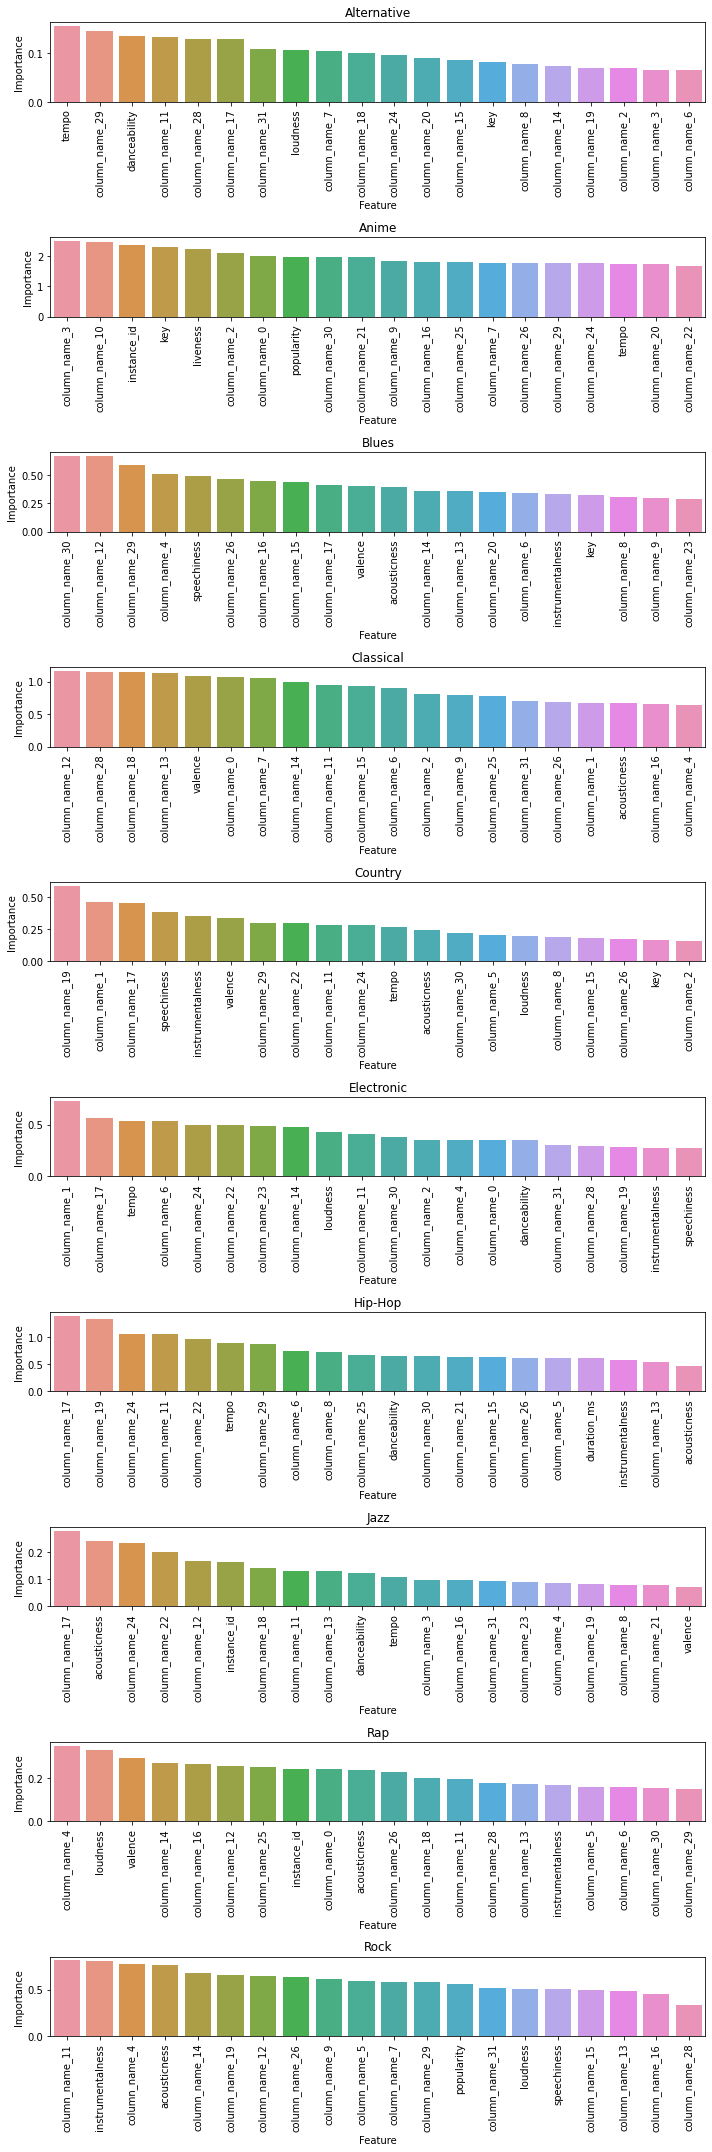

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the column names from the feature matrix
feature_names = Data.select_dtypes(exclude=['object']).columns

# Get the labels from the label binarizer
labels = mlb.classes_

# Get the final estimator from the pipeline
#final_estimator = ovo_clf.estimators_[-1]

# Get the feature importances for each logistic regression model
feature_importances = []
for estimator in ovo_clf.estimators_:
    feature_importances.append(abs(estimator.coef_[0]))

# Convert the feature importances and names into a dataframe
df_feature_importances = pd.DataFrame(feature_importances, columns=feature_names)

# Plot the top 5 feature importances for each label
fig, axes = plt.subplots(nrows=len(labels), figsize=(10, 30))
for i, label in enumerate(labels):
    top_20_features = df_feature_importances.iloc[:,i].sort_values(ascending=False)[:20]
    sns.barplot(x=feature_names[top_20_features.index], y=top_20_features, ax=axes[i])
    axes[i].set_title(label)
    axes[i].set_xlabel('Feature')
    axes[i].set_ylabel('Importance')
    axes[i].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()
